# visualization related

## visual parameters

In [ ]:
# The style parameters control properties like the color of the background and whether a grid is enabled by default.
# sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_style("whitegrid")
params = {
'figure.figsize':(12,6),
'figure.titlesize':20,
'font.size': 15,
'axes.titlesize': 20,
'axes.labelsize': 15,
'xtick.labelsize': 15,
'ytick.labelsize': 15,
'legend.fontsize': 15,
'boxplot.showmeans': True,
'boxplot.meanprops.marker': 'o',
'boxplot.meanprops.markeredgecolor': 'k',
'boxplot.meanprops.markerfacecolor': 'r',
'boxplot.meanprops.markersize': 10.1,
'boxplot.medianprops.color': 'r',
'boxplot.medianprops.linewidth': 2.0,
}
plt.rcParams.update(params)
# plt.rcParams.update(plt.rcParamsDefault)
# print(plt.style.library)
# print(plt.rcParams['figure.figsize'])

## multiple plots

In [ ]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Outcome":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Outcome',y=feature,data=df)

## plot labels

In [ ]:
def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment

In [ ]:
ax = sns.countplot(x="species", data = df)
ax.bar_label(ax.containers[0], fontsize="small");

In [ ]:
ax = sns.countplot(x="species", hue="sex", data = df)
for p in ax.containers:
    ax.bar_label(p)

In [ ]:
ax = sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
ax.bar_label(ax.containers[0],fmt="%.3f");
plt.xticks(rotation = 90)
plt.tight_layout()

In [ ]:
plt.figure(figsize=(12,6))
splot = sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

In [ ]:
imp_feats.sort_values('Importance')

## 3D plotly

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter_3d(df, 
                    x='culmen_length_mm',
                    y='flipper_length_mm',
                    z='culmen_depth_mm',
                    color='species')
fig.show();

## All possible scatter plots in  a df

In [ ]:
plt.figure(figsize = (20,18))
plot_number = 1
for i in df:
    for j in df:
        if j!=i:
            plt.subplot(4,3,plot_number)
            plt.scatter(df[j], df[i], c = clusters, cmap = "viridis")
            plt.xlabel(j)
            plt.ylabel(i)
            plot_number += 1
            
# 4 feature 3 class ımız var. Her bir kombinasyon için bir scatter plot çizdirdik
# Bütün featureların birbiri ile olan ilişkisini görüyoruz
# Hangi featureların nasıl ayrıştığını görüyoruz

## All histograms in df

In [ ]:
df.hist(figsize=(15, 12), bins=15);

## correalations as barplot

In [ ]:
ax = df.corr()["Customer_Segment"][:-1].sort_values().plot(kind="barh")
ax.bar_label(ax.containers[0], fmt="%.2f");
# Her bir feature ın customer segment ile olan korelasyonu
# Ash_alcanity ve flavanoids customer segmenti belirleyiciymiş

In [ ]:
df.corr()['Exited'][:-1].sort_values().plot.barh();

## subplots

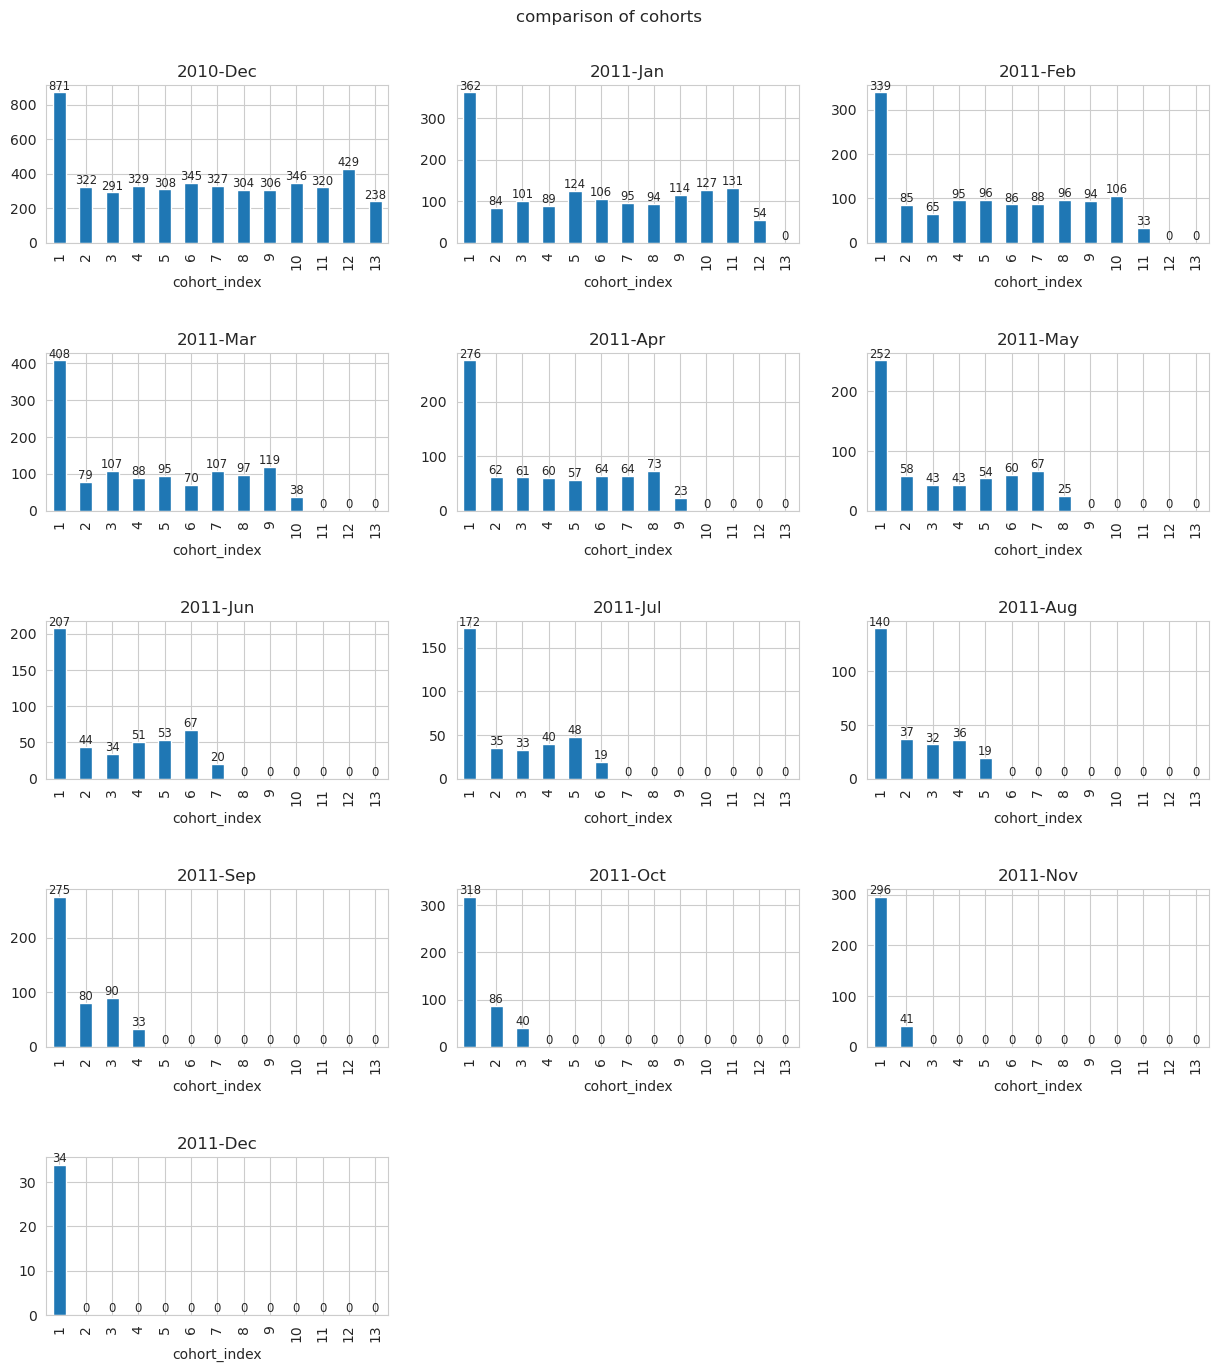

In [ ]:
plt.figure(figsize=(15,15))
plt.suptitle("comparison of cohorts")

for i in range(len(cohort_df)):
    plt.subplot(5,3,i+1)
    ax = cohort_df.iloc[i].plot(kind="bar", title=cohort_df.index[i].strftime("%Y-%b"))
    ax.bar_label(ax.containers[0], fontsize="small")
    plt.subplots_adjust(top=0.93, hspace=0.7)

# Pandas

## combine hierarchical columns name

In [ ]:
%%script echo skipping
df.columns = [f'{x}_{y}' for x,y in df.columns]

## duplike kolonları duplike satır gibi düş

In [ ]:
df = df.T.drop_duplicates().T
df.select_dtypes('O').describe().T

## unique values in object columns

In [ ]:
for feature in df.columns:
    if df[feature].dtype=="object":
        print(df[feature].unique())

In [ ]:
for feature in df.columns:
    if df[feature].dtype=="object":
        print(feature, df[feature].nunique())

## value counts in all object columns

In [ ]:
for feature in df.columns:
    if df[feature].dtype=="object":
        print()
        print(feature)
        print("**************")
        print()
        print(df[feature].value_counts(dropna=False))

## dict to df with iterating a df

In [ ]:
mydict = {}
for i in df.Cust_id.unique():
    a = df[df["Cust_id"] == i][["Order_Date"]].sort_values(by="Order_Date").drop_duplicates()
    if len(a) >= 3:
        b = (a.iloc[2] - a.iloc[0]).dt.days[0]
        mydict[i] = b
data = {"cust_id": mydict.keys(), "days_between1st_3th_purchase": mydict.values()}
cust_more3purchase = pd.DataFrame(data)           
cust_more3purchase
    
        

## To select rows whose column value is in an iterable, 

In [ ]:
df.loc[df['column_name'].isin(an iterable like list)]

## Dropna 

In [2]:
df.dropna(subset="column_name", inplace=True)

## groupby and sort

In [130]:
df.sort_values("Date", ascending=False).groupby("CustomerID")["CustomerID", "Date"].head(1)
# finds the last order date of customers.
# first sort and then groupby and then take the firs one. 

,CustomerID,Date
541893,13113.000,2011-12-09
541260,16558.000,2011-12-09
541541,15498.000,2011-12-09
541542,15344.000,2011-12-09
541545,12985.000,2011-12-09
...,...,...
1181,14237.000,2010-12-01
973,14729.000,2010-12-01
1400,15165.000,2010-12-01
2029,17643.000,2010-12-01


## convert float to int in all df

In [ ]:
df = df.astype('Int64') # also can be used in series

astype(int) and astype('int64') cannot handle missing values (numpy int),
astype('Int64') (note the capital I) can handle missing values (pandas int)

# file operations

## download from url (a drive address) to your drive

In [ ]:
# İstenilen yere download ediyor
import gdown

url = 'https://drive.google.com/u/0/uc?id=1wtZvloOKYdbEvrm4vBXhTUFnLy7ejR5H&export=download' #from a someone's drive
output = '/content/drive/MyDrive/Colab Notebooks/cell_images.zip' # to your drive. dont need download to local.

gdown.download(url, output, quiet=False)


# Numpy

## Get a random number in a range

In [ ]:
random.randrange(0, 10001)

## linspace

In [ ]:
np.linspace(50 , 1000, 4) float  # döndürebilir

In [ ]:
np.linspace(50 , 1000, 4).astype(int)   # integer döndürür

## Color print

In [4]:
from colorama import Fore, Back, Style
a = "some more text or variable"
print(Fore.RED + "some text,", a, Style.RESET_ALL)
print("normal text again")


some text, some more text or variable 
normal text again


## create new column with where 

In [ ]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] > 4.5, "Top Customers",
                                    (np.where(rfm_df['RFM_Score'] > 4,"High value Customer",
                                    (np.where(rfm_df['RFM_Score'] > 3,"Medium Value Customer",
                                     np.where(rfm_df['RFM_Score'] > 1.6,'Low Value Customers', 'Lost Customers'))))))
rfm_df[['CustomerID', 'RFM_Score', 'Customer_segment']].head(20)